Project Title Concrete Compressive Strength Prediction
Technologies Machine Learning Technology
Domain Infra
Project Difficulties level Intermediate

## Problem Statement:
The quality of concrete is determined by its compressive strength, which is measured
using a conventional crushing test on a concrete cylinder. The strength of the concrete
is also a vital aspect in achieving the requisite longevity. It will take 28 days to test
strength, which is a long period. So, what will we do now? We can save a lot of time and
effort by using Data Science to estimate how much quantity of which raw material we
need for acceptable compressive strength.



Thanks to AHIALE DARLINGTON
for this beautiful dataset Concrete Compressive Strength DataSet.


## Approach: 
The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.

## Results: 
You have to build a solution that should able to predict the compressive
strength of the concrete.

## Project Evaluation metrics:
Code:
• You are supposed to write a code in a modular fashion
• Safe: It can be used without causing harm.
• Testable: It can be tested at the code level.
• Maintainable: It can be maintained, even as your codebase grows.
• Portable: It works the same in every environment (operating system)
• You have to maintain your code on GitHub.
• You have to keep your GitHub repo public so that anyone can check your code.
• Proper readme file you have to maintain for any project development.
• You should include basic workflow and execution of the entire project in the readme
file on GitHub
• Follow the coding standards: https://www.python.org/dev/peps/pep-0008/


In [2]:
!pip install matplotlib
!pip install seaborn
!pip install plotly


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: /usr/local/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: /usr/local/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
  Using cached plotly-5.14.1-py2.py3-none-any.whl (15.3 MB)

[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: /usr/local/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip


In [4]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import warnings
warnings.filterwarnings("ignore")
import math 
%matplotlib inline  

In [5]:
#using dataset
df=pd.read_csv("concrete_data.csv")

In [6]:
df.head()  #head for dataset

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
df.describe() #describe numerical dataset.

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
df.shape

(1030, 9)

In [9]:
df.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: /usr/local/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip


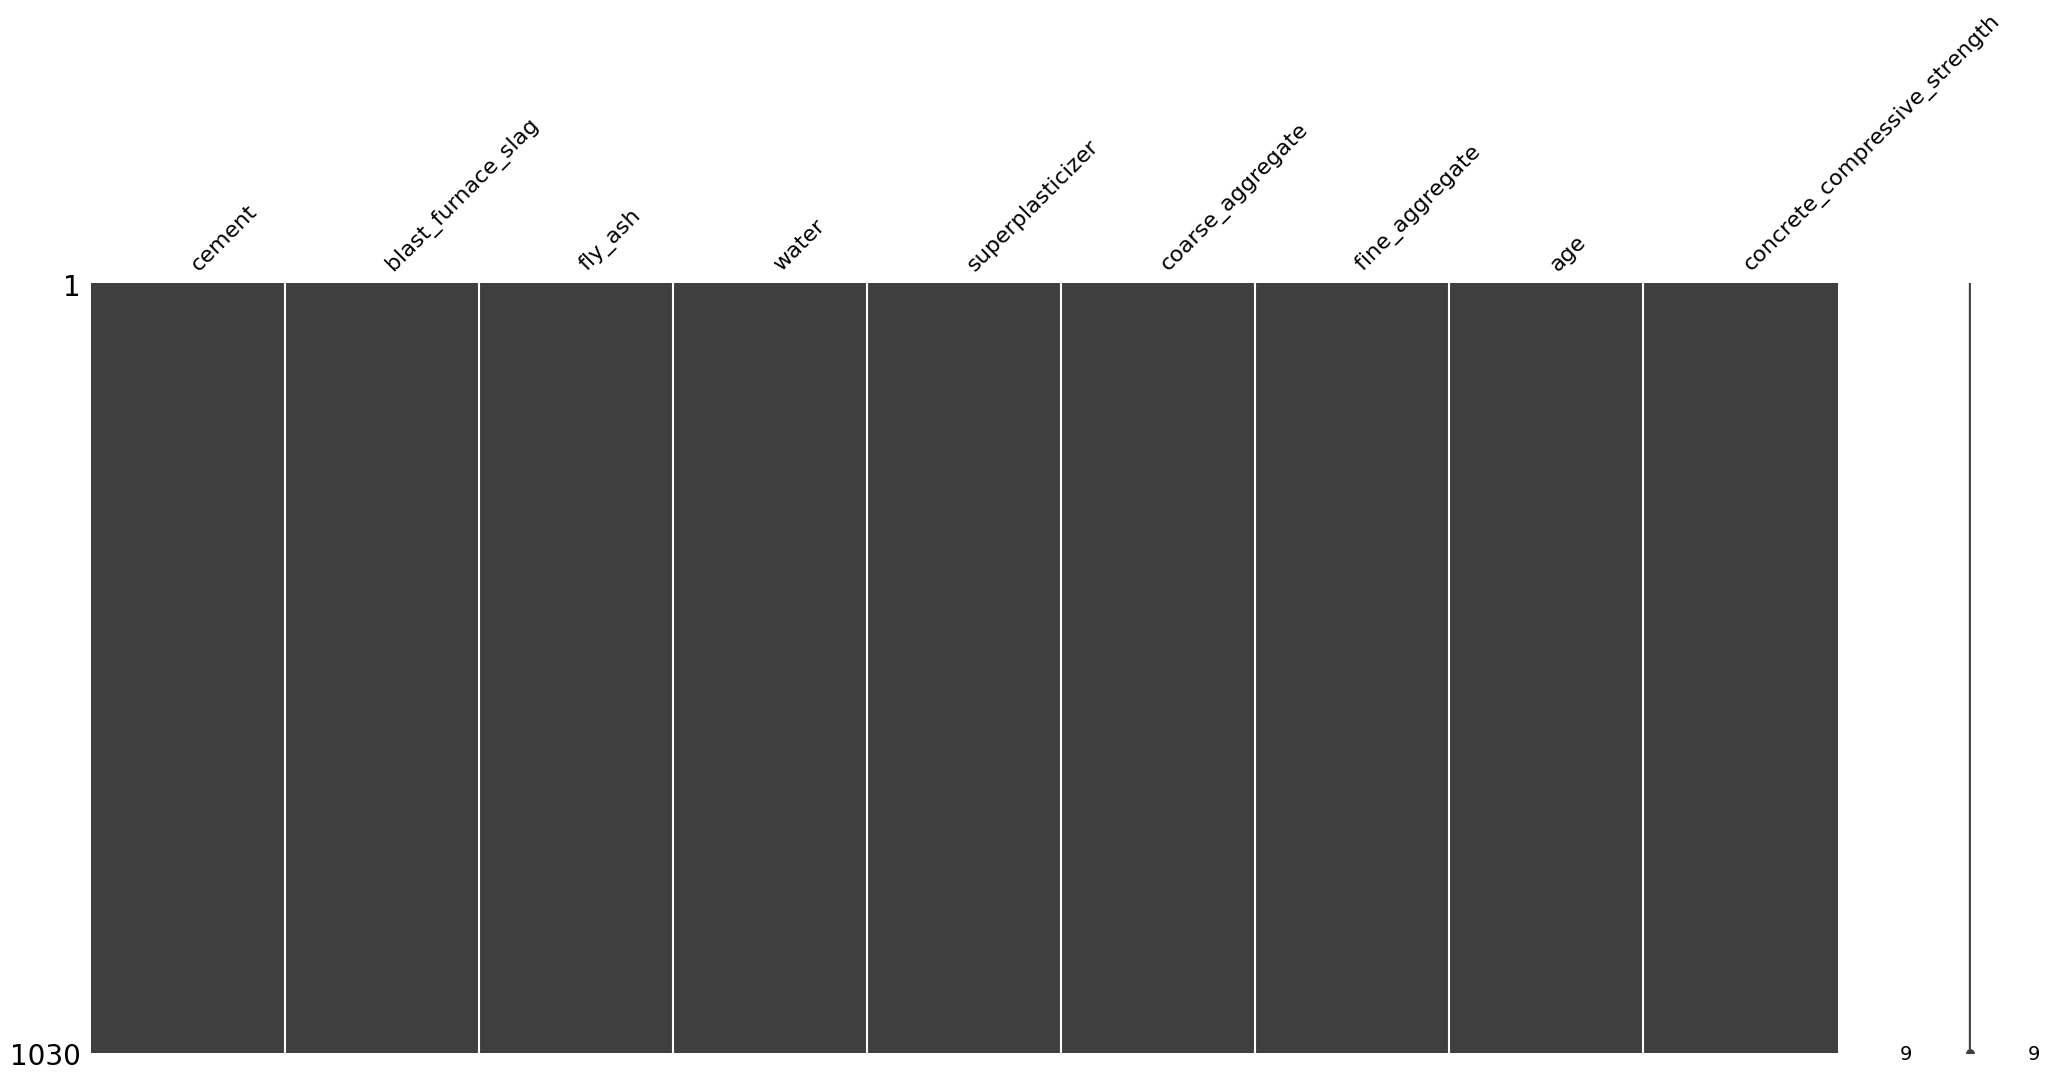

In [10]:
!pip install missingno
import missingno as ms
ms.matrix(df)  #datasets has null value for not using missingno module
plt.show()

The dataset has nothing null in it 

In [11]:
df_=df.drop(columns=["concrete_compressive_strength"])

In [12]:
df["concrete_compressive_strength"]

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: concrete_compressive_strength, Length: 1030, dtype: float64

In [13]:
df_columns=df_.keys()
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler  #standarize the dataset to make it more useable.
scaler =  Pipeline([('Normalizer', Normalizer()), 
#                    ('log-transformation', math.logp())
                   ])
df_=scaler.fit_transform(df_);
df_=np.array(df_);df_

array([[0.39624448, 0.        , 0.        , ..., 0.76313751, 0.49603938,
        0.02054601],
       [0.39293409, 0.        , 0.        , ..., 0.7676768 , 0.49189527,
        0.02037436],
       [0.27357162, 0.11724498, 0.        , ..., 0.76682331, 0.48872645,
        0.22214838],
       ...,
       [0.12141129, 0.11397127, 0.08878967, ..., 0.72961238, 0.63771588,
        0.02289237],
       [0.1222549 , 0.14346317, 0.        , ..., 0.76042395, 0.60620297,
        0.02151563],
       [0.21646863, 0.08338481, 0.06496548, ..., 0.71727531, 0.63181625,
        0.02323159]])

In [14]:
df1=pd.DataFrame(df_,columns=df_columns)
# df1= np.log1p(df1)
df1["concrete_compressive_strength"]=df["concrete_compressive_strength"]
df1

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,0.396244,0.000000,0.000000,0.118873,0.001834,0.763138,0.496039,0.020546,79.99
1,0.392934,0.000000,0.000000,0.117880,0.001819,0.767677,0.491895,0.020374,61.89
2,0.273572,0.117245,0.000000,0.187592,0.000000,0.766823,0.488726,0.222148,40.27
3,0.268151,0.114922,0.000000,0.183875,0.000000,0.751630,0.479043,0.294361,41.05
4,0.145536,0.097024,0.000000,0.140700,0.000000,0.716983,0.604936,0.263812,44.30
...,...,...,...,...,...,...,...,...,...
1025,0.227316,0.095400,0.074264,0.147706,0.007320,0.715584,0.631862,0.023028,44.28
1026,0.264217,0.000000,0.094797,0.160728,0.008528,0.670711,0.667021,0.022961,31.18
1027,0.121411,0.113971,0.088790,0.157549,0.004987,0.729612,0.637716,0.022892,23.70
1028,0.122255,0.143463,0.000000,0.134934,0.008683,0.760424,0.606203,0.021516,32.77


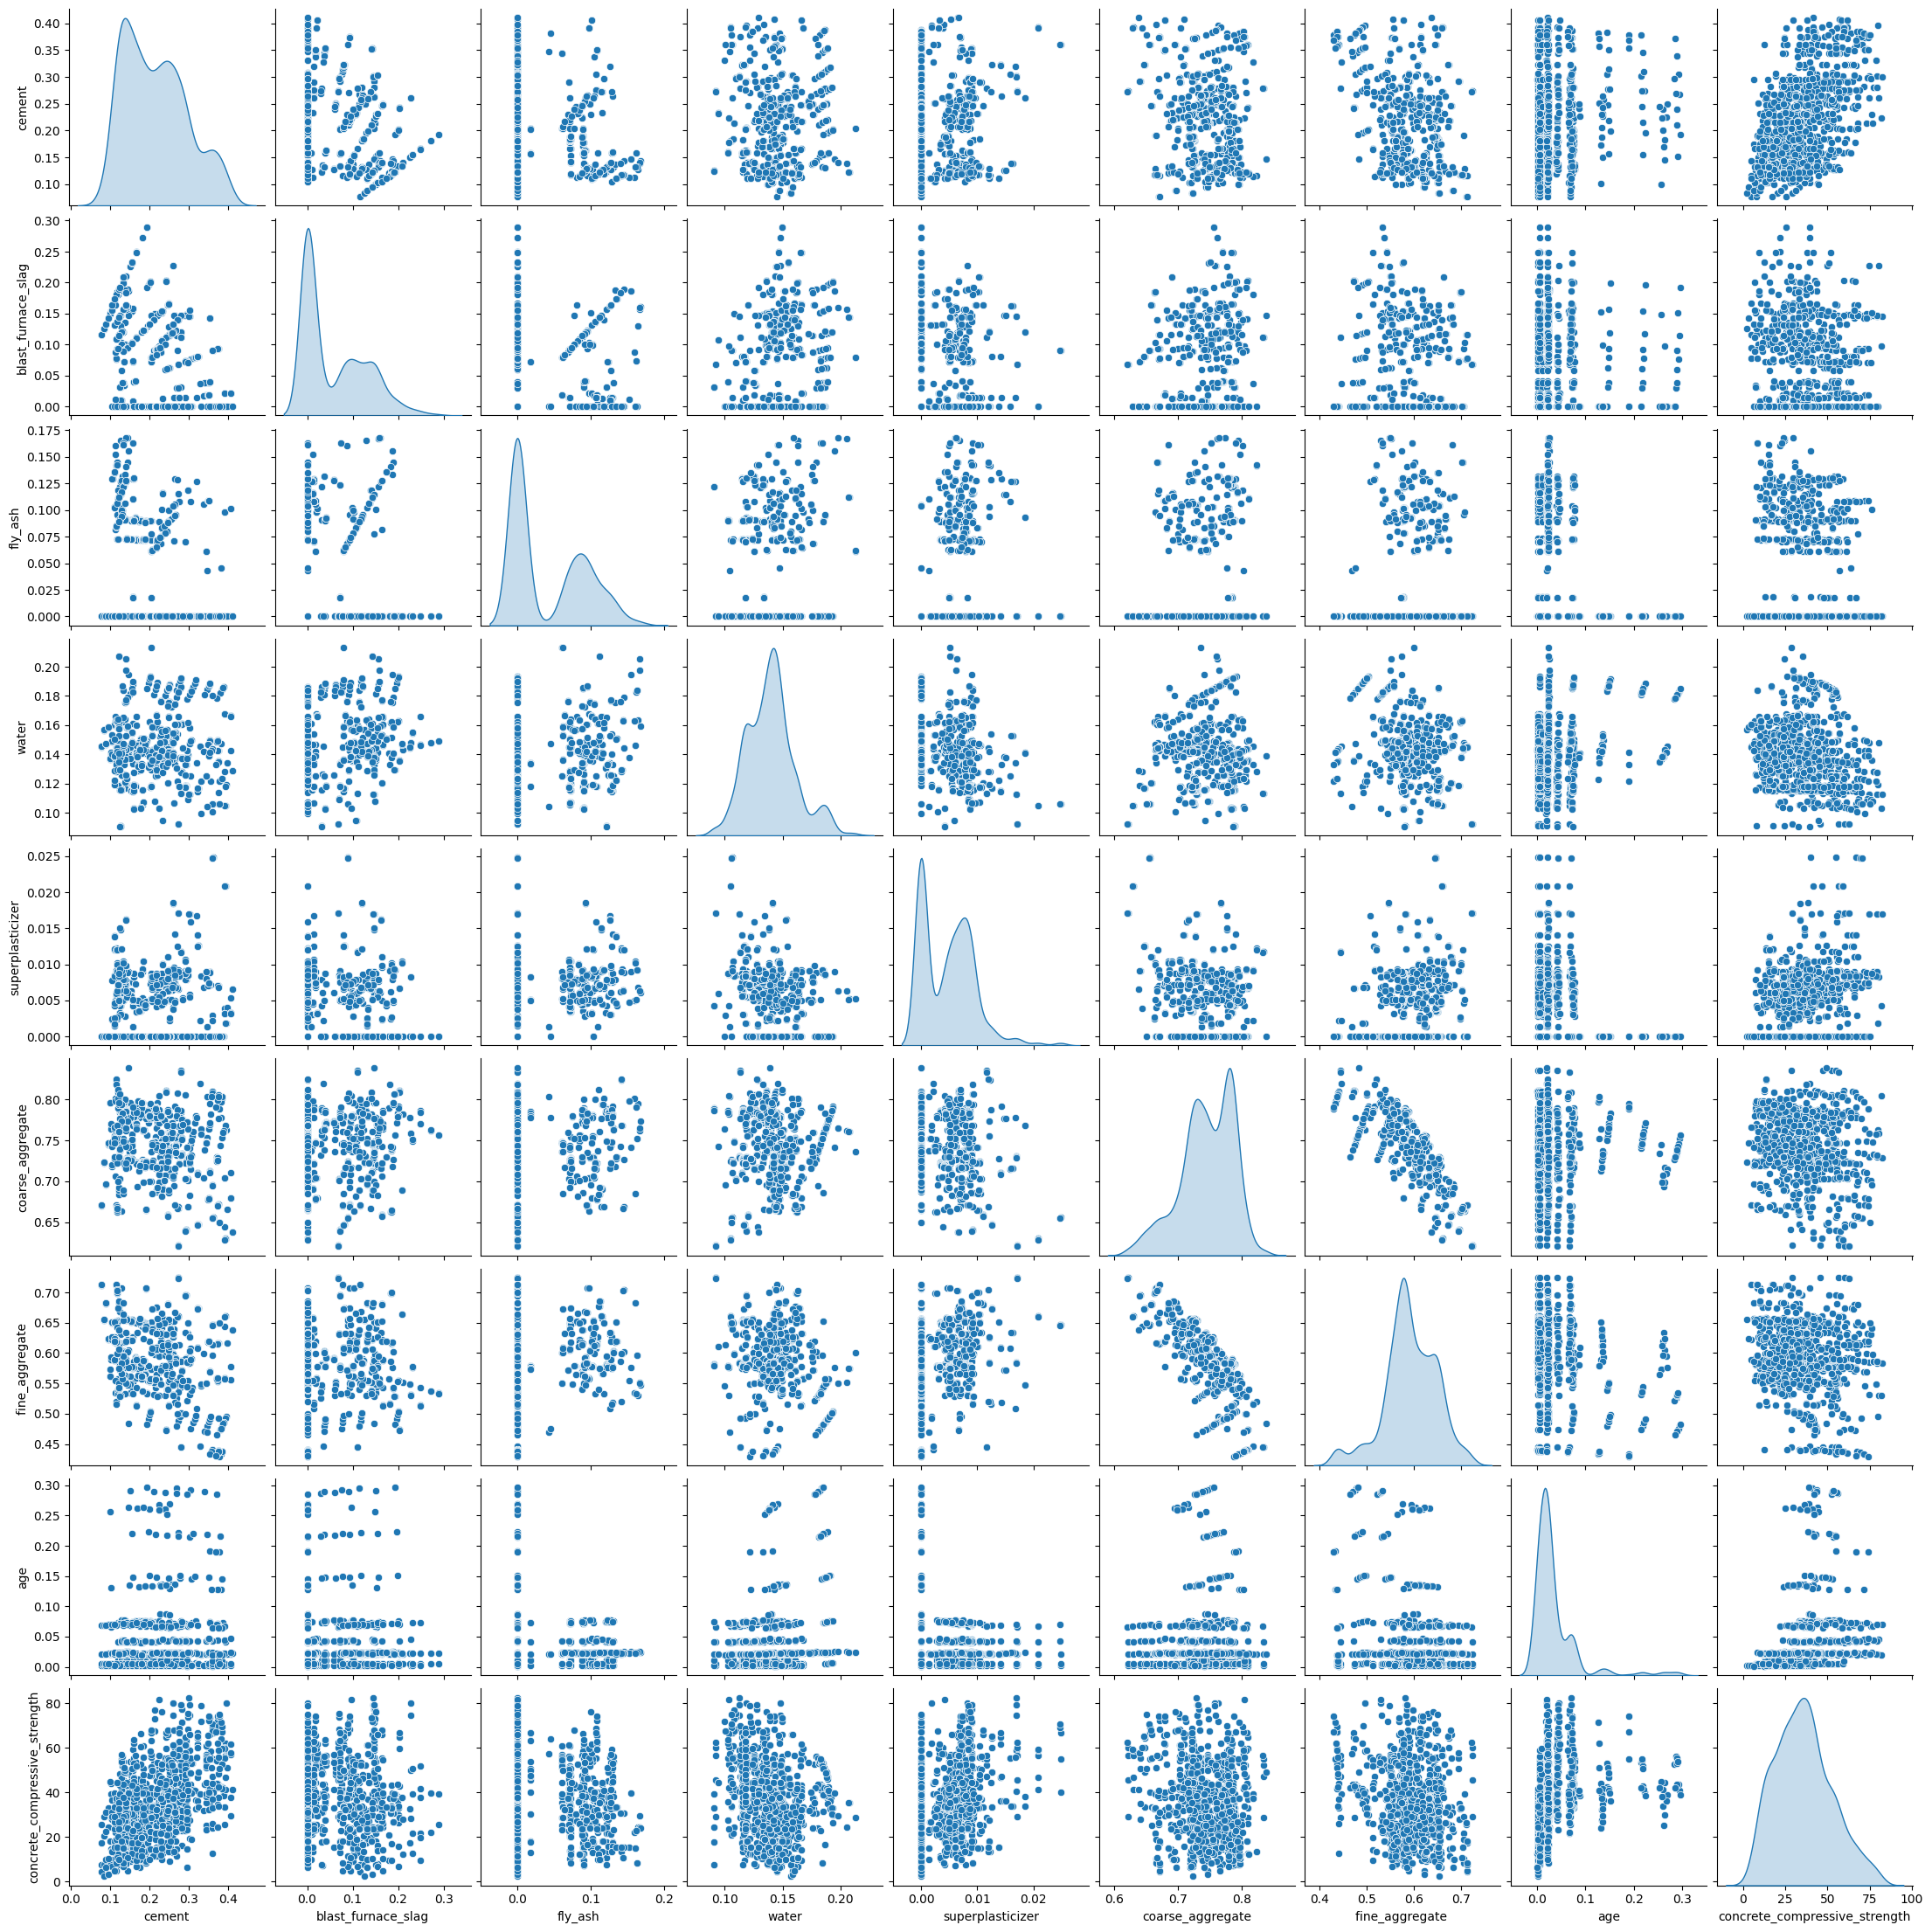

In [15]:
sns.pairplot(data=df1, diag_kind='kde')

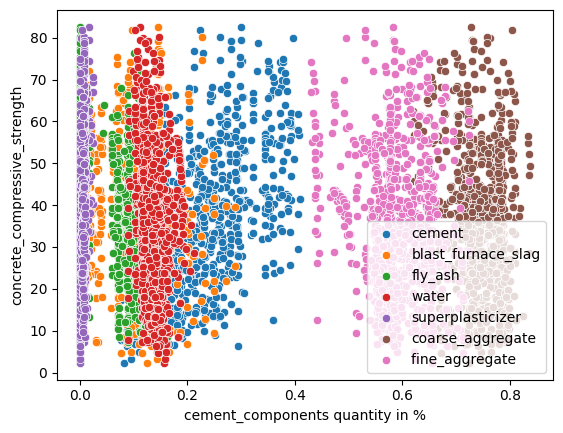

In [17]:
list_=[i for i in df.iloc[:,:-1]]
for i in range(0,7):
    sns.scatterplot(x=df1[list_[i]],y=df1["concrete_compressive_strength"])
    plt.xlabel("cement_components quantity in %")
    plt.legend(list_,loc='lower right')

<Axes: xlabel='cement', ylabel='concrete_compressive_strength'>

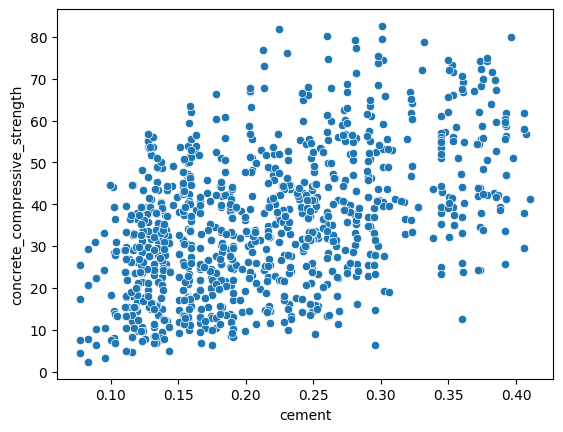

In [18]:
sns.scatterplot(x=df1["cement"],y=df1["concrete_compressive_strength"])

In [19]:
df1

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,0.396244,0.000000,0.000000,0.118873,0.001834,0.763138,0.496039,0.020546,79.99
1,0.392934,0.000000,0.000000,0.117880,0.001819,0.767677,0.491895,0.020374,61.89
2,0.273572,0.117245,0.000000,0.187592,0.000000,0.766823,0.488726,0.222148,40.27
3,0.268151,0.114922,0.000000,0.183875,0.000000,0.751630,0.479043,0.294361,41.05
4,0.145536,0.097024,0.000000,0.140700,0.000000,0.716983,0.604936,0.263812,44.30
...,...,...,...,...,...,...,...,...,...
1025,0.227316,0.095400,0.074264,0.147706,0.007320,0.715584,0.631862,0.023028,44.28
1026,0.264217,0.000000,0.094797,0.160728,0.008528,0.670711,0.667021,0.022961,31.18
1027,0.121411,0.113971,0.088790,0.157549,0.004987,0.729612,0.637716,0.022892,23.70
1028,0.122255,0.143463,0.000000,0.134934,0.008683,0.760424,0.606203,0.021516,32.77


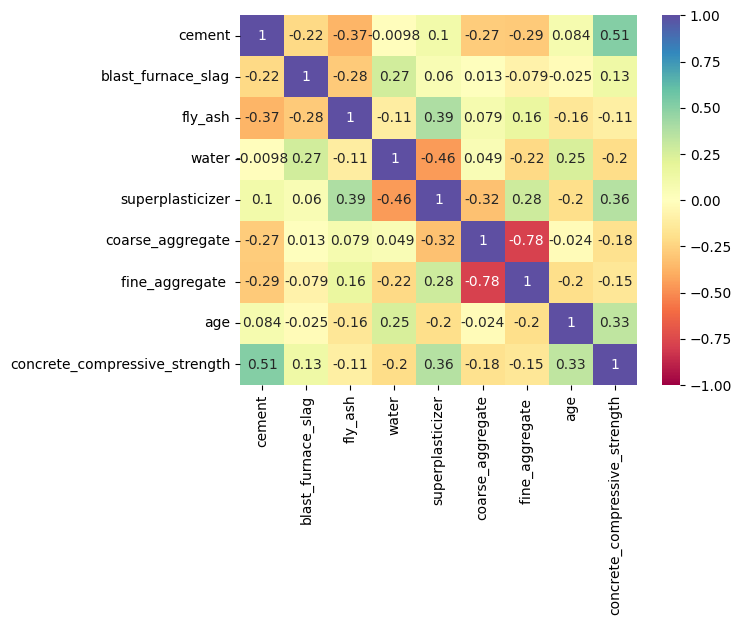

In [20]:
corr = df1.corr()
sns.heatmap(corr,cmap="Spectral",annot=True,vmax=1,vmin=-1)
plt.show()

Doesn't show clear picture.
coarse aggregrates greatly affect the compressive strength negativaly 

# feature importance 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
X = df1.drop(columns=["concrete_compressive_strength"])
y = df1.concrete_compressive_strength

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle=True)

In [22]:
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
440    24.85
346    40.15
254    13.54
694    32.88
344    17.57
Name: concrete_compressive_strength, Length: 258, dtype: float64

In [23]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)

RandomForestRegressor()

In [24]:
sort = rf.feature_importances_.argsort()

In [25]:
sort

array([5, 2, 6, 1, 4, 3, 0, 7])

Text(0.5, 0, 'Feature Importance')

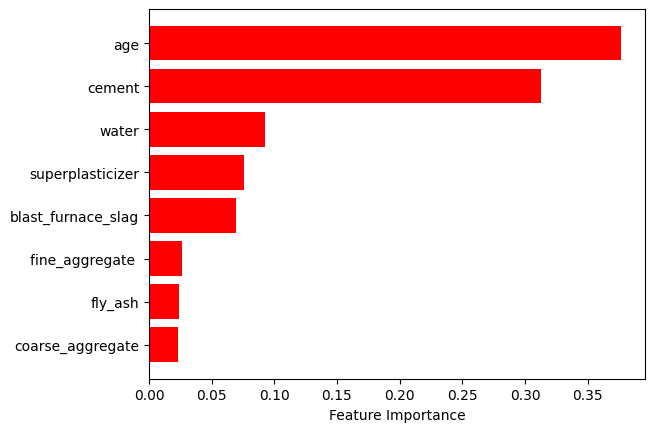

In [26]:
plt.barh(df1.columns[sort], rf.feature_importances_[sort],color="red")
plt.xlabel("Feature Importance")

In [27]:
## fINDING THE BEST FEATURES 

In [28]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 23.7 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)

[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: /usr/local/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip


In [29]:
#just to check the adjusted r -squared and r-squared p test etc
import statsmodels.api as sm

# performing the regression
# and fitting the model
result = sm.OLS(df1["concrete_compressive_strength"], sm.add_constant(df1.iloc[:,:-1])).fit()
 
# printing the summary table
print(result.summary())

                                  OLS Regression Results                                 
Dep. Variable:     concrete_compressive_strength   R-squared:                       0.664
Model:                                       OLS   Adj. R-squared:                  0.662
Method:                            Least Squares   F-statistic:                     252.6
Date:                           Fri, 12 May 2023   Prob (F-statistic):          6.29e-236
Time:                                   11:32:09   Log-Likelihood:                -3799.0
No. Observations:                           1030   AIC:                             7616.
Df Residuals:                               1021   BIC:                             7661.
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [32]:
!pip install lightgbm
!pip install xgboost


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: /usr/local/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: /usr/local/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip


## Check other models 

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgbm
import xgboost as xg
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# generic function to fit model and return metrics for every algorithm
def boost_models(x):
    # transforming target variable through quantile transformer
    regr_trans = TransformedTargetRegressor(regressor=x, transformer=QuantileTransformer(output_distribution='normal'))
    regr_trans.fit(X_train, y_train)
    yhat = regr_trans.predict(X_test)
    algoname = x.__class__.__name__
    return algoname, round(r2_score(y_test, yhat),3), round(mean_absolute_error(y_test, yhat),2), round(np.sqrt(mean_squared_error(y_test, yhat)),2), round(mean_squared_error(y_test,yhat),2)

# define regression models
models = [
    GradientBoostingRegressor(),
    lgbm.LGBMRegressor(),
    xg.XGBRFRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    KNeighborsRegressor(),
    RandomForestRegressor(),
    BaggingRegressor(ExtraTreeRegressor(), random_state=42),
    Ridge(alpha=0.1, max_iter=100000),
    Lasso(),
    GaussianProcessRegressor()
]

# load dataset
df = pd.read_csv('./concrete_data.csv')

# split data into training and test sets
X = df.drop('concrete_compressive_strength', axis=1)  # features
y = df['concrete_compressive_strength']  # target variable

# normalize input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# evaluate regression models
scores = []
for model in models:
    scores.append(boost_models(model))

# collate all scores in a table
score_table = pd.DataFrame(scores, columns=['Model', 'R2 Score', 'MAE', 'RMSE', 'MSE'])
print(score_table)


                        Model  R2 Score    MAE   RMSE     MSE
0   GradientBoostingRegressor     0.883   4.07   5.63   31.67
1               LGBMRegressor     0.923   3.12   4.57   20.88
2              XGBRFRegressor     0.832   5.07   6.75   45.57
3       DecisionTreeRegressor     0.778   4.90   7.74   59.93
4            LinearRegression     0.578   8.39  10.68  114.17
5         KNeighborsRegressor     0.661   7.33   9.58   91.69
6       RandomForestRegressor     0.877   3.93   5.76   33.20
7            BaggingRegressor     0.877   4.10   5.77   33.27
8                       Ridge     0.578   8.39  10.68  114.11
9                       Lasso    -0.000  13.24  16.45  270.58
10   GaussianProcessRegressor    -1.047  15.89  23.53  553.76


Looks like random forest and light gbm regressor works best.

## Choose the best model Using Hyperparameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

import xgboost as xg
param_grid = {'n_estimators': [1000],  
              'max_depth': [7, 8],
              'reg_lambda' :[0.25, 0.2],
              'max_depth' :[0,5,10,20], 
              'eta':[0.1,0.2,0.5], 'subsample':[0.5,0.7], 'colsample_bytree':[0.5,0.8],
              "learning_rate":[0.1,0.2,0.5]
             }
                
grid = GridSearchCV(xg.XGBRFRegressor(), param_grid, refit = True, verbose = 3, n_jobs=-1) #
regr_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution='normal'))

# fitting the model for grid search 
grid_result=regr_trans.fit(X_train, y_train)
best_params=grid_result.regressor_.best_params_
print(best_params)

#using best params to create and fit model
best_model = LGBMRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], reg_lambda=best_params["reg_lambda"])
regr_trans = TransformedTargetRegressor(regressor=best_model)
#                                         transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
ypred = regr_trans.predict(X_test)

#evaluate metrics
r2_score(y_test, ypred), mean_absolute_error(y_test, ypred), np.sqrt(mean_squared_error(y_test, ypred))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.1, max_depth=10, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=-0.008 total time=   0.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.1, max_depth=20, n_estimators=1000, reg_lambda=0.25, subsample=0.7;, score=-0.005 total time=   1.0s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.1, max_depth=20, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=-0.187 total time=   0.8s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.2, max_depth=0, n_estimators=1000, reg_lambda=0.25, subsample=0.5;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.2, max_depth=0, n_estimators=1000, reg_lambda=0.25, subsample=0.5;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.2, max_depth=0, n_estimators=1000, reg_lambda=0.25, subsample=0.5;, score=nan tot

[CV 3/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.2, max_depth=20, n_estimators=1000, reg_lambda=0.25, subsample=0.5;, score=0.066 total time=   0.9s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.2, max_depth=20, n_estimators=1000, reg_lambda=0.25, subsample=0.5;, score=-0.032 total time=   0.9s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.5, max_depth=0, n_estimators=1000, reg_lambda=0.25, subsample=0.5;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.5, max_depth=0, n_estimators=1000, reg_lambda=0.25, subsample=0.5;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.5, max_depth=0, n_estimators=1000, reg_lambda=0.25, subsample=0.5;, score=nan total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.5, max_depth=0, n_estimators=1000, reg_lambda=0.25, subsample=0.5;, score=nan total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, learnin

[CV 1/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.1, max_depth=5, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=-0.015 total time=   0.4s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.1, max_depth=10, n_estimators=1000, reg_lambda=0.25, subsample=0.7;, score=-0.005 total time=   0.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.1, max_depth=10, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=-0.080 total time=   0.7s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.1, max_depth=10, n_estimators=1000, reg_lambda=0.2, subsample=0.7;, score=-0.082 total time=   0.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.1, max_depth=20, n_estimators=1000, reg_lambda=0.25, subsample=0.7;, score=-0.142 total time=   1.0s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.1, max_depth=20, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=-0.086 total time=   0.8s
[CV 2/5] END colsample_bytree=0.5, eta=

[CV 4/5] END colsample_bytree=0.5, eta=0.2, learning_rate=0.5, max_depth=20, n_estimators=1000, reg_lambda=0.2, subsample=0.7;, score=0.369 total time=   1.0s
[CV 5/5] END colsample_bytree=0.5, eta=0.2, learning_rate=0.5, max_depth=20, n_estimators=1000, reg_lambda=0.2, subsample=0.7;, score=0.411 total time=   0.9s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.1, max_depth=10, n_estimators=1000, reg_lambda=0.25, subsample=0.5;, score=-0.081 total time=   0.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.1, max_depth=10, n_estimators=1000, reg_lambda=0.25, subsample=0.7;, score=-0.184 total time=   0.7s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.1, max_depth=10, n_estimators=1000, reg_lambda=0.2, subsample=0.7;, score=-0.140 total time=   0.8s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.1, max_depth=20, n_estimators=1000, reg_lambda=0.25, subsample=0.5;, score=-0.189 total time=   0.8s
[CV 5/5] END colsample_bytree=0.5, eta=

[CV 1/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.5, max_depth=10, n_estimators=1000, reg_lambda=0.25, subsample=0.7;, score=0.393 total time=   1.2s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.5, max_depth=20, n_estimators=1000, reg_lambda=0.25, subsample=0.5;, score=0.432 total time=   1.0s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.5, max_depth=20, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=0.383 total time=   1.4s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.5, max_depth=20, n_estimators=1000, reg_lambda=0.2, subsample=0.7;, score=0.369 total time=   1.3s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, learning_rate=0.1, max_depth=5, n_estimators=1000, reg_lambda=0.25, subsample=0.7;, score=-0.070 total time=   0.7s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, learning_rate=0.1, max_depth=5, n_estimators=1000, reg_lambda=0.2, subsample=0.7;, score=-0.061 total time=   0.8s
[CV 1/5] END colsample_bytree=0.8, eta=0.1,

[CV 1/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.1, max_depth=10, n_estimators=1000, reg_lambda=0.2, subsample=0.7;, score=-0.004 total time=   0.8s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.1, max_depth=20, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=-0.080 total time=   0.9s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.1, max_depth=20, n_estimators=1000, reg_lambda=0.2, subsample=0.7;, score=-0.082 total time=   1.0s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.2, max_depth=5, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=0.090 total time=   0.4s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.2, max_depth=5, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=0.003 total time=   0.4s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.2, max_depth=10, n_estimators=1000, reg_lambda=0.25, subsample=0.5;, score=0.067 total time=   0.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, 

[CV 2/5] END colsample_bytree=0.8, eta=0.2, learning_rate=0.5, max_depth=0, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, eta=0.2, learning_rate=0.5, max_depth=0, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=nan total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, eta=0.2, learning_rate=0.5, max_depth=0, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=nan total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, eta=0.2, learning_rate=0.5, max_depth=0, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=nan total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, eta=0.2, learning_rate=0.5, max_depth=0, n_estimators=1000, reg_lambda=0.2, subsample=0.7;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, eta=0.2, learning_rate=0.5, max_depth=0, n_estimators=1000, reg_lambda=0.2, subsample=0.7;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, eta=0.2, learning_rate=0.5, m

[CV 3/5] END colsample_bytree=0.8, eta=0.5, learning_rate=0.2, max_depth=5, n_estimators=1000, reg_lambda=0.2, subsample=0.7;, score=0.104 total time=   0.5s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, learning_rate=0.2, max_depth=10, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=0.113 total time=   1.0s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, learning_rate=0.2, max_depth=10, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=0.007 total time=   1.0s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, learning_rate=0.2, max_depth=20, n_estimators=1000, reg_lambda=0.25, subsample=0.7;, score=0.060 total time=   1.3s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, learning_rate=0.2, max_depth=20, n_estimators=1000, reg_lambda=0.25, subsample=0.7;, score=0.118 total time=   1.2s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, learning_rate=0.5, max_depth=5, n_estimators=1000, reg_lambda=0.25, subsample=0.5;, score=0.456 total time=   0.5s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, l

[CV 3/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.2, max_depth=10, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=0.069 total time=   0.8s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.2, max_depth=10, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=-0.029 total time=   0.7s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.2, max_depth=20, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=0.054 total time=   0.9s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.2, max_depth=20, n_estimators=1000, reg_lambda=0.2, subsample=0.7;, score=0.110 total time=   1.1s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.5, max_depth=5, n_estimators=1000, reg_lambda=0.25, subsample=0.7;, score=0.380 total time=   0.5s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, learning_rate=0.5, max_depth=5, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=0.414 total time=   0.4s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, le

[CV 2/5] END colsample_bytree=0.5, eta=0.1, learning_rate=0.2, max_depth=0, n_estimators=1000, reg_lambda=0.25, subsample=0.7;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, learning_rate=0.2, max_depth=0, n_estimators=1000, reg_lambda=0.25, subsample=0.7;, score=nan total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, learning_rate=0.2, max_depth=0, n_estimators=1000, reg_lambda=0.25, subsample=0.7;, score=nan total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, learning_rate=0.2, max_depth=0, n_estimators=1000, reg_lambda=0.25, subsample=0.7;, score=nan total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, learning_rate=0.2, max_depth=0, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, learning_rate=0.2, max_depth=0, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, learning_rate=0.

[CV 5/5] END colsample_bytree=0.8, eta=0.2, learning_rate=0.5, max_depth=5, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=0.450 total time=   0.6s
[CV 1/5] END colsample_bytree=0.8, eta=0.2, learning_rate=0.5, max_depth=5, n_estimators=1000, reg_lambda=0.2, subsample=0.7;, score=0.425 total time=   0.6s
[CV 1/5] END colsample_bytree=0.8, eta=0.2, learning_rate=0.5, max_depth=10, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=0.449 total time=   1.2s
[CV 2/5] END colsample_bytree=0.8, eta=0.2, learning_rate=0.5, max_depth=10, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=0.475 total time=   1.0s
[CV 5/5] END colsample_bytree=0.8, eta=0.2, learning_rate=0.5, max_depth=20, n_estimators=1000, reg_lambda=0.25, subsample=0.5;, score=0.475 total time=   1.2s
[CV 1/5] END colsample_bytree=0.8, eta=0.2, learning_rate=0.5, max_depth=20, n_estimators=1000, reg_lambda=0.25, subsample=0.7;, score=0.460 total time=   1.3s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, le

[CV 4/5] END colsample_bytree=0.5, eta=0.1, learning_rate=0.5, max_depth=5, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=0.328 total time=   0.4s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, learning_rate=0.5, max_depth=10, n_estimators=1000, reg_lambda=0.25, subsample=0.7;, score=0.364 total time=   1.0s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, learning_rate=0.5, max_depth=10, n_estimators=1000, reg_lambda=0.25, subsample=0.7;, score=0.408 total time=   0.9s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, learning_rate=0.5, max_depth=20, n_estimators=1000, reg_lambda=0.25, subsample=0.7;, score=0.382 total time=   1.1s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, learning_rate=0.5, max_depth=20, n_estimators=1000, reg_lambda=0.25, subsample=0.7;, score=0.447 total time=   1.2s
[CV 4/5] END colsample_bytree=0.5, eta=0.2, learning_rate=0.1, max_depth=5, n_estimators=1000, reg_lambda=0.25, subsample=0.5;, score=-0.196 total time=   0.4s
[CV 3/5] END colsample_bytree=0.5, eta=0.2

[CV 5/5] END colsample_bytree=0.8, eta=0.5, learning_rate=0.2, max_depth=10, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=0.093 total time=   1.0s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, learning_rate=0.2, max_depth=10, n_estimators=1000, reg_lambda=0.2, subsample=0.7;, score=0.142 total time=   1.1s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, learning_rate=0.2, max_depth=20, n_estimators=1000, reg_lambda=0.25, subsample=0.7;, score=0.014 total time=   1.2s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, learning_rate=0.2, max_depth=20, n_estimators=1000, reg_lambda=0.25, subsample=0.7;, score=0.100 total time=   1.3s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, learning_rate=0.5, max_depth=5, n_estimators=1000, reg_lambda=0.25, subsample=0.5;, score=0.391 total time=   0.5s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, learning_rate=0.5, max_depth=5, n_estimators=1000, reg_lambda=0.25, subsample=0.7;, score=0.496 total time=   0.5s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, 

[CV 3/5] END colsample_bytree=0.8, eta=0.2, learning_rate=0.5, max_depth=20, n_estimators=1000, reg_lambda=0.2, subsample=0.7;, score=0.536 total time=   1.3s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, learning_rate=0.1, max_depth=5, n_estimators=1000, reg_lambda=0.2, subsample=0.7;, score=0.003 total time=   0.5s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, learning_rate=0.1, max_depth=10, n_estimators=1000, reg_lambda=0.25, subsample=0.5;, score=-0.169 total time=   1.0s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, learning_rate=0.1, max_depth=10, n_estimators=1000, reg_lambda=0.2, subsample=0.5;, score=-0.117 total time=   1.0s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, learning_rate=0.1, max_depth=10, n_estimators=1000, reg_lambda=0.2, subsample=0.7;, score=-0.060 total time=   1.1s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, learning_rate=0.1, max_depth=20, n_estimators=1000, reg_lambda=0.25, subsample=0.7;, score=-0.054 total time=   1.3s
[CV 1/5] END colsample_bytree=0.8, eta=0.

[CV 1/5] END colsample_bytree=0.5, eta=0.2, learning_rate=0.1, max_depth=0, n_estimators=1000, reg_lambda=0.25, subsample=0.5;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.2, learning_rate=0.1, max_depth=0, n_estimators=1000, reg_lambda=0.25, subsample=0.5;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, eta=0.2, learning_rate=0.1, max_depth=0, n_estimators=1000, reg_lambda=0.25, subsample=0.5;, score=nan total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, eta=0.2, learning_rate=0.1, max_depth=0, n_estimators=1000, reg_lambda=0.25, subsample=0.5;, score=nan total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, eta=0.2, learning_rate=0.1, max_depth=0, n_estimators=1000, reg_lambda=0.25, subsample=0.5;, score=nan total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, eta=0.2, learning_rate=0.1, max_depth=0, n_estimators=1000, reg_lambda=0.25, subsample=0.7;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.2, learning_rate=

{'colsample_bytree': 0.8, 'eta': 0.1, 'learning_rate': 0.5, 'max_depth': 20, 'n_estimators': 1000, 'reg_lambda': 0.2, 'subsample': 0.7}


(0.9321585973565577, 2.7983026415204098, 4.2844063469932445)

In [43]:
best_model

LGBMRegressor(max_depth=20, n_estimators=1000, reg_lambda=0.2)

In [44]:
best_params

{'colsample_bytree': 0.8,
 'eta': 0.1,
 'learning_rate': 0.5,
 'max_depth': 20,
 'n_estimators': 1000,
 'reg_lambda': 0.2,
 'subsample': 0.7}

In [45]:
from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# regr = RandomForestRegressor(max_depth=2, random_state=42)
regr = LGBMRegressor(n_estimators=1000, max_depth=20, eta=0.1, subsample=0.7, colsample_bytree=0.8,learning_rate=.1,reg_lambda=0.2)
#best_model
regr.fit(X_train, y_train)

[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


LGBMRegressor(colsample_bytree=0.8, eta=0.1, max_depth=20, n_estimators=1000,
              reg_lambda=0.2, subsample=0.7)

In [46]:
y_pred=regr.predict(X_test);y_pred

array([51.82981738, 39.77856107, 76.18008674, 35.14217296, 10.64376529,
       45.06332503, 23.99815747, 48.11202641, 35.88597925, 44.86493233,
       36.87364443, 16.21289452, 39.64461157, 53.24719812, 28.53891367,
       25.85947187, 39.55151041, 18.52561618, 36.72249979, 34.68003372,
       32.41151202, 33.68663422, 49.89702967,  8.23996074, 36.79864888,
       34.23636911,  9.00529534, 41.77609341, 57.35353694, 13.55085693,
       49.63541625, 33.74249874, 45.02868169, 58.62780217, 17.54027075,
       35.35542796, 33.00526188, 45.3547477 , 13.97598829, 55.67140406,
       16.48962077,  5.63977653, 37.17534946, 45.03346213, 14.90024406,
       64.34912835, 44.72233916, 32.96222991, 22.74174075,  3.84161773,
       57.35356664, 47.98791323, 24.24651728, 13.52867926, 52.31570545,
       35.11397662, 28.20477958, 12.25916423, 30.37498616, 18.39708683,
       43.49526528, 15.20599612, 39.07058678, 50.56122346, 33.03602221,
       22.82261889, 32.53151479, 13.06414279, 29.37574729, 22.33

In [64]:
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
250    24.92
377    36.30
615    32.33
9      39.29
357    66.82
Name: concrete_compressive_strength, Length: 309, dtype: float64

In [65]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("r2_score",round(r2_score(y_test, y_pred), 4)*100)

MAE: 2.80697137056129
MSE: 18.940495023054986
RMSE: 4.352067901935238
r2_score 93.0


## Great 93 % r2 score acheived ............................

In [66]:
# save the model to disk

import pickle

filename = 'finalized_model.sav'
pickle.dump(regr, open(filename, 'wb'))

scaler_ = "scaler.pkl"
pickle.dump(scaler, open(scaler_, 'wb'))

In [67]:
# cement	blast_furnace_slag	fly_ash	water	superplasticizer	
# coarse_aggregate	fine_aggregate	age	concrete_compressive_strength

In [68]:
## ALL THINGS BELOW THIS ARE FOR STREAMLIT APP

In [69]:
pickled_model = pickle.load(open('finalized_model.sav', 'rb'))
pickled_scaler=pickle.load(open('scaler.pkl', 'rb'))

In [70]:
# pickled_scaler.fit_transform([cement, blast_furnace_slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age])
# scaler_list=scaler.fit_transform([[cement, blast_furnace_slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age]]).tolist()

In [71]:
import streamlit as st
#Caching the model for faster loading
# @st.cache

In [72]:
def predict(cement, blast_furnace_slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age):
    
    #Predicting the price of the carat
    scaler_list=pickled_scaler.fit_transform([[cement, blast_furnace_slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age]]).tolist()

    prediction = pickled_model.predict(pd.DataFrame(scaler_list,columns=["cement", "blast_furnace_slag", "fly_ash", "water", "superplasticizer",
                                                                         "coarse_aggregate", "fine_aggregate", "age"]))    
    return prediction

In [73]:
st.title('Compressive Strength Concrete Predictor')
st.image("""https://civildigital.com/wp-content/uploads/2016/07/Hydraulic-Compression-Testing-Machine.jpg""")
st.header('Enter the Components of Concrete') 

DeltaGenerator()

In [74]:
cement = st.number_input('cement:', min_value=0.1, max_value=10.0, value=1.0)

blast_furnace_slag = st.number_input('blast_furnace_slag:', min_value=0.1, max_value=100.0, value=1.0)

fly_ash = st.number_input('fly_ash:', min_value=0.1, max_value=100.0, value=1.0)

water = st.number_input('water:', min_value=0.1, max_value=100.0, value=1.0)

superplasticizer = st.number_input('superplasticizer:', min_value=0.1, max_value=100.0, value=1.0)

coarse_aggregate = st.number_input('Coarse_aggregates:', min_value=0.1, max_value=100.0, value=1.0)

fine_aggregate = st.number_input('Fine_aggregates:', min_value=0.1, max_value=100.0, value=1.0)

age = st.slider('Age in years:', min_value=0.5, max_value=150.0, value=1.0)

In [75]:
if st.button('Componets of Concrete'):
    price = predict(cement, blast_furnace_slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age )
    st.success(f'The predicted compressive strength of concrete is ${concrete_compressive_strength:.2f}')

In [79]:
import streamlit as st
# Caching the model for faster loading
# @st.cache
import pickle

pickled_model = pickle.load(open('finalized_model.sav', 'rb'))
pickled_scaler = pickle.load(open('scaler.pkl', 'rb'))


def predict(cement, blast_furnace_slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age):

    # Predicting the price of the carat
    pickled_scaler.fit_transform([cement, blast_furnace_slag, fly_ash,
                                 water, superplasticizer, coarse_aggregate, fine_aggregate, age])
    scaler_list = scaler.fit_transform(
        [[cement, blast_furnace_slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age]]).tolist()

    scaler_list = pickled_scaler.fit_transform(
        [[cement, blast_furnace_slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age]]).tolist()

    prediction = pickled_model.predict(pd.DataFrame(scaler_list, columns=["cement", "blast_furnace_slag", "fly_ash", "water", "superplasticizer",
                                                                          "coarse_aggregate", "fine_aggregate", "age"]))
    return prediction


st.title('Compressive Strength Concrete Predictor')
st.image("""https://civildigital.com/wp-content/uploads/2016/07/Hydraulic-Compression-Testing-Machine.jpg""")
st.header('Enter the Components of Concrete')


cement = st.number_input('cement:')

blast_furnace_slag = st.number_input(
    'blast_furnace_slag:')

fly_ash = st.number_input('fly_ash:')

water = st.number_input('water:')

superplasticizer = st.number_input(
    'superplasticizer:')

coarse_aggregate = st.number_input(
    'Coarse_aggregates:')

fine_aggregate = st.number_input(
    'Fine_aggregates:')

age = st.slider('Age in years:')


if st.button('Componets of Concrete'):
    price = predict(cement, blast_furnace_slag, fly_ash, water,
                    superplasticizer, coarse_aggregate, fine_aggregate, age)
    st.success(
        f'The predicted compressive strength of concrete is ${concrete_compressive_strength:.2f}')

    

UsageError: Line magic function `%streamlit` not found.
